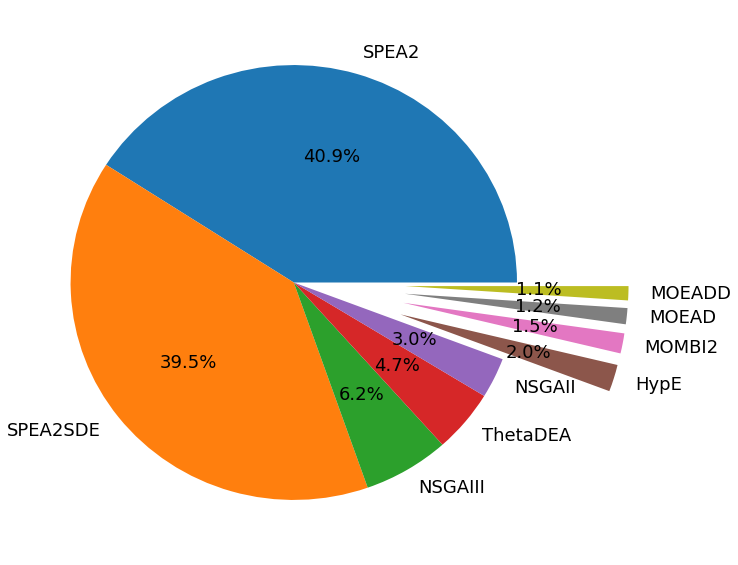

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

summary = pd.DataFrame()

probs=[
       "MaF01", "MaF02", # "MaF03", "MaF04", "MaF05", "MaF06", "MaF07", "MaF08", "MaF09", 
       "MaF10" #, "MaF11", "MaF12", "MaF13", "MaF14", "MaF15"
      ]

m=5
alg="HHCOR2"
for prob in probs:
    path="../MaFMethodology/%s/full/%s/%s/output/"%(m, alg, prob)
    runs = [str(i) for i in range(0, 20)]
    algs=["SPEA2","MOEAD","NSGAII","MOEADD","MOMBI2","NSGAIII","ThetaDEA","SPEA2SDE","HypE"]
    df_list=[]
    for run in runs:
        df = pd.read_csv(path+"selected."+run, names=["Selected"])
        df['it'] = np.arange(len(df))
        df['run'] = run
        df_list.append(df)
    maxit = df.max()['it']

    df = pd.concat(df_list)
    df = df.groupby(['Selected', 'it']).size()
    df = df.to_frame(name = 'count').reset_index()
    df['count'] = df['count'] / 20 # divided by 20 independent runs
    df['countnorm'] = df['count'] / maxit # divided by max iterations
    df['cumcount'] = df.groupby(['Selected'])['countnorm'].cumsum()    
    df['prob'] = "%s(%s)"%(prob, m)
    
    
    for i in range(0, len(algs)):
        df.loc[df['Selected']==i, 'Selected'] = algs[i]
    
    summary = summary.append(df.groupby(['Selected']).max())

    
# summary
df = summary.groupby(['Selected']).mean().reset_index()

# df.plot.pie(y='cumcount', labels=df['Selected'], autopct='%1.1f%%', explode=(1, 1, 1, 1, 0, 0, 0, 0, 0))

df = df.sort_values(['cumcount'], ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(df['cumcount'], 
        labels=df['Selected'], 
        autopct='%1.1f%%', 
        textprops={'fontsize': 18}, 
        explode=(0, 0, 0, 0, 0, 0.5, 0.5, 0.5, 0.5))
plt.show()